In [10]:
import tensorflow as tf
import tensorflow_addons as tfa

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, AveragePooling2D, Lambda, Input, Dense
from tensorflow.keras.layers import ReLU, LeakyReLU, PReLU, Activation
from tensorflow.keras.utils import plot_model

## small network for small dataset

In [12]:
def build_nin(activation, shape, classes):
    if activation == 'relu':
        activation_layer_1 = ReLU()
        activation_layer_2 = ReLU()
        activation_layer_3 = ReLU()
        activation_layer_4 = ReLU()
        activation_layer_5 = ReLU()
        activation_layer_6 = ReLU()
        activation_layer_7 = ReLU()
        activation_layer_8 = ReLU()
        activation_layer_9 = ReLU()
    elif activation == 'leaky_relu':
        activation_layer_1 = LeakyReLU()
        activation_layer_2 = LeakyReLU()
        activation_layer_3 = LeakyReLU()
        activation_layer_4 = LeakyReLU()
        activation_layer_5 = LeakyReLU()
        activation_layer_6 = LeakyReLU()
        activation_layer_7 = LeakyReLU()
        activation_layer_8 = LeakyReLU()
        activation_layer_9 = LeakyReLU()
    elif activation == 'prelu':
        activation_layer_1 = PReLU()
        activation_layer_2 = PReLU()
        activation_layer_3 = PReLU()
        activation_layer_4 = PReLU()
        activation_layer_5 = PReLU()
        activation_layer_6 = PReLU()
        activation_layer_7 = PReLU()
        activation_layer_8 = PReLU()
        activation_layer_9 = PReLU()
    elif activation == 'rrelu':
        activation_layer_1 = Activation(activation=tfa.activations.rrelu())
        activation_layer_2 = Activation(activation=tfa.activations.rrelu())
        activation_layer_3 = Activation(activation=tfa.activations.rrelu())
        activation_layer_4 = Activation(activation=tfa.activations.rrelu())
        activation_layer_5 = Activation(activation=tfa.activations.rrelu())
        activation_layer_6 = Activation(activation=tfa.activations.rrelu())
        activation_layer_7 = Activation(activation=tfa.activations.rrelu())
        activation_layer_8 = Activation(activation=tfa.activations.rrelu())
        activation_layer_9 = Activation(activation=tfa.activations.rrelu())

    input_layer = Input(shape)
    x = Conv2D(filters=192, kernel_size=(5, 5), padding='same')(input_layer)
    x = activation_layer_1(x)
    x = Conv2D(filters=160, kernel_size=(1, 1), padding='same')(x)
    x = activation_layer_2(x)
    x = Conv2D(filters=96, kernel_size=(1, 1), padding='same')(x)
    x = activation_layer_3(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = Dropout(rate=0.5)(x)
    x = Conv2D(filters=192, kernel_size=(5, 5), padding='same')(x)
    x = activation_layer_4(x)
    x = Conv2D(filters=192, kernel_size=(1, 1), padding='same')(x)
    x = activation_layer_5(x)
    x = Conv2D(filters=192, kernel_size=(1, 1), padding='same')(x)
    x = activation_layer_6(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = Dropout(rate=0.5)(x)
    x = Conv2D(filters=192, kernel_size=(3, 3), padding='same')(x)
    x = activation_layer_7(x)
    x = Conv2D(filters=192, kernel_size=(1, 1), padding='same')(x)
    x = activation_layer_8(x)
    x = Conv2D(filters=10, kernel_size=(1, 1), padding='same')(x)
    x = activation_layer_9(x)
    x = AveragePooling2D(pool_size=(7, 7))(x)
    output_layer = Dense(classes, activation=tf.nn.softmax)(x)

    model = Model(input_layer, output_layer)

    return model

In [13]:
model = build_nin(activation='relu', shape=(32, 32, 3), classes=12)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 192)       14592     
                                                                 
 re_lu_4 (ReLU)              (None, 32, 32, 192)       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 160)       30880     
                                                                 
 re_lu_5 (ReLU)              (None, 32, 32, 160)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 96)        15456     
                                                                 
 re_lu_6 (ReLU)              (None, 32, 32, 96)        0   

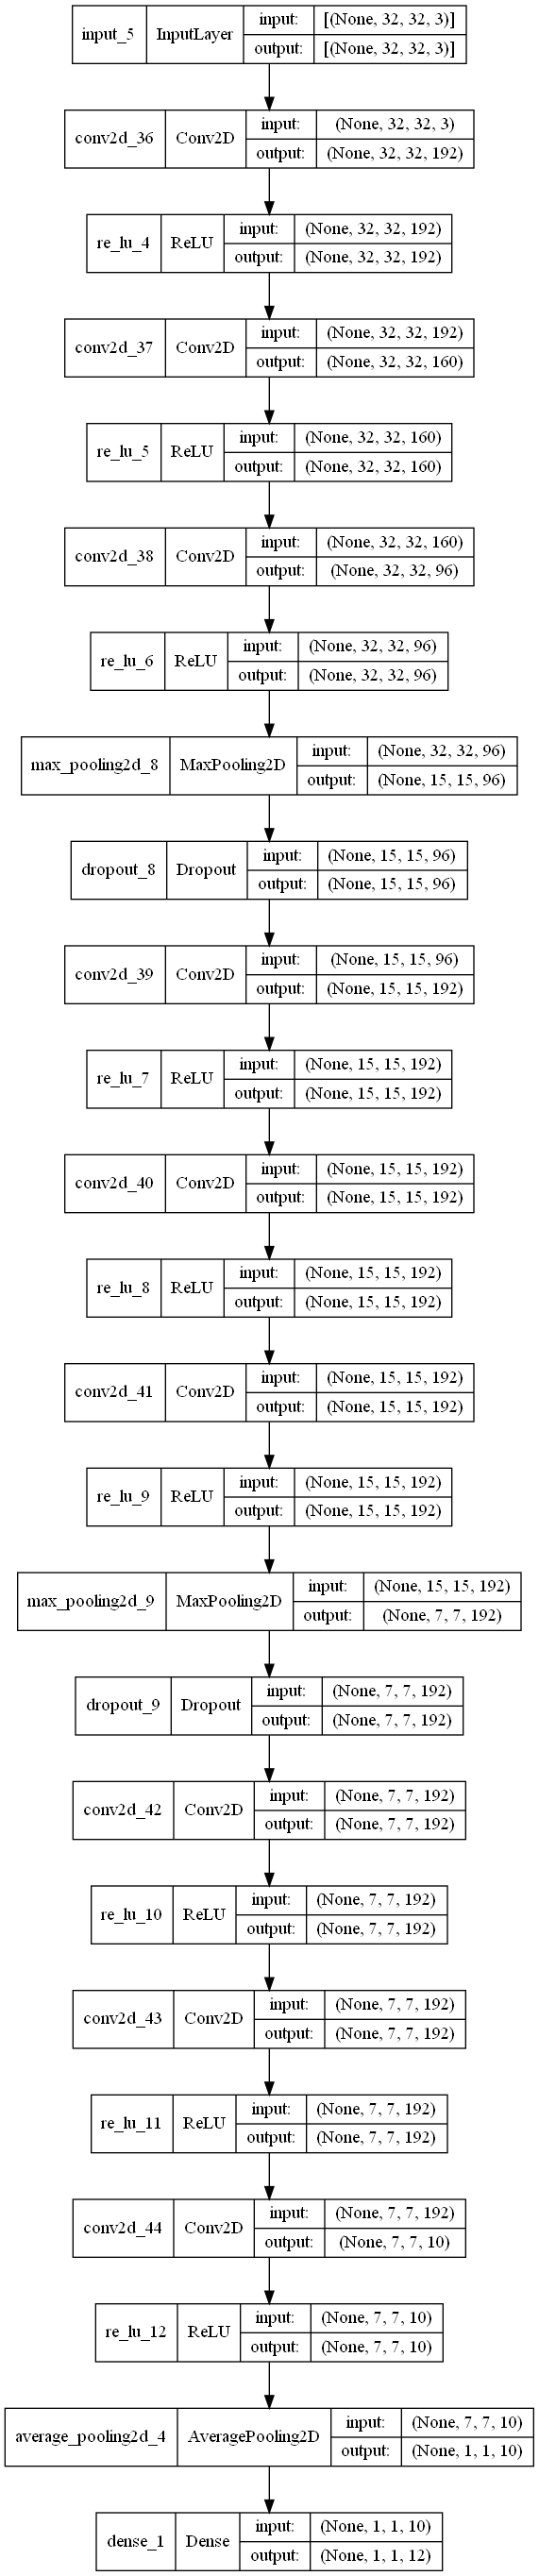

In [14]:
plot_model(model, to_file='nin_model.png', show_shapes=True, show_layer_names=True)